Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 4

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 60% accuracy (above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See below)
- [ ] Stacking Ensemble. (See below)
- [ ] More Categorical Encoding. (See below)

### RandomizedSearchCV / GridSearchCV, for model selection

- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?

### Stacking Ensemble

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

In [44]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module4')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

## Train, Test, Val Split.

In [46]:
# split data into train, val.
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              stratify=train['status_group'], random_state=42)
# show the data frame shapes.
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

## Create Wrangle Function.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""       
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # create buckets.
    # lga.
    bucket = X['lga'].value_counts()[:20].index
    X.loc[~X['lga'].isin(bucket), 'lga'] = 'Other'
    # ward.
    bucket = X['ward'].value_counts()[:20].index
    X.loc[~X['ward'].isin(bucket), 'ward'] = 'Other'
    # subvillage.
    bucket = X['subvillage'].value_counts()[:100].index
    X.loc[~X['subvillage'].isin(bucket), 'subvillage'] = 'Other'
    # funder.
    bucket = X['funder'].value_counts()[:20].index
    X.loc[~X['funder'].isin(bucket), 'funder'] = 'Other'
    # installer.
    bucket = X['installer'].value_counts()[:20].index
    X.loc[~X['installer'].isin(bucket), 'installer'] = 'Other'


    # use datetime.strptime and split date_recorded into year, month, day columns.
    year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
    X['year'] = X['date_recorded'].map(year)
    month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
    X['month'] = X['date_recorded'].map(month)
    day = lambda x: datetime.strptime(x, "%Y-%m-%d" ).day
    X['day'] = X['date_recorded'].map(day)

    # remove duplicates/bad columns.
    X = X.drop(columns=['date_recorded', 'quantity_group', 'quality_group', 'waterpoint_type_group', 'extraction_type_group', 'payment_type', 'num_private'])

    # Engineer feature: how many years from construction_year to date_recorded
    X['years_missing'] = X['year'] - X['construction_year']
    # Create new feature pump_age.
    X['pump_age'] = 2013 - X['construction_year']
    X.loc[X['pump_age'] == 2013, 'pump_age'] = 0
    X.loc[X['pump_age'] == 0, 'pump_age'] = 10
    
    # return the wrangled dataframe
    return X


# use the wrange function on the tran, val, test data.
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

## Set the Target, Select Numeric & Cardinality Features.

In [0]:
# create the target as status_group.
target = 'status_group'
# set the features, remove target and id column.
train_features = train.drop(columns=[target, 'id'])
# group all the numeric features.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# group the cardinality of the nonnumeric features.
cardinality = train_features.select_dtypes(exclude='number').nunique()
# group all categorical features with cardinality <= 100.
categorical_features = cardinality[cardinality <= 100].index.tolist()
# create features with numeric + categorical
features = numeric_features + categorical_features
# create the new vaules with the new features/target data.
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

## Random Forest Classifier Model + OrdinalEncoder.

In [51]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
   ce.OrdinalEncoder(),
   SimpleImputer(strategy='median'),
   StandardScaler(),
   RandomForestClassifier(max_features=0.27119137837218854, max_depth=None, min_samples_leaf=2, n_estimators=344, min_samples_split=2, random_state=42,  n_jobs=-1) 
)

pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

Training Accuracy 0.9407407407407408
Validation Accuracy 0.8157407407407408


## Confusion Matrix.

In [0]:
from sklearn.model_selection import cross_val_score

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k,
                        scoring='accuracy')
print(f'MAE for {k} folds', scores)

MAE for 3 folds [0.80318142 0.80649031 0.79916661]


In [0]:
print(scores.mean())
scores.std()

0.8029461130911155


0.002994511835496907

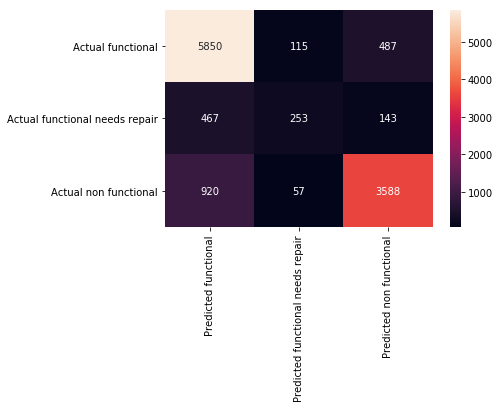

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_pred)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    
    return sns.heatmap(table, annot=True, fmt='d')
    
plot_confusion_matrix(y_val, y_pred)

In [0]:
# how many correct predicitons.
Correct_Predictions = 5850 + 253 + 3588
Correct_Predictions

9691

In [0]:
# how many total predicitons.
Total_Predictions = 5850 + 115 + 487 + 467 + 253 + 143 + 920 + 57 + 3588
Total_Predictions

11880

In [0]:
# what is the classification accuracy.
accuracy = Correct_Predictions / Total_Predictions
accuracy

0.8157407407407408

## Classification Metrics: Precision and Recall.
[Scikit-Learn User Guide — Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [0]:
# classification report.
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

                         precision    recall  f1-score   support

             functional       0.81      0.91      0.85      6452
functional needs repair       0.60      0.29      0.39       863
         non functional       0.85      0.79      0.82      4565

               accuracy                           0.82     11880
              macro avg       0.75      0.66      0.69     11880
           weighted avg       0.81      0.82      0.81     11880



#### Wikipedia, [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

> Both precision and recall are based on an understanding and measure of relevance.

> Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12.

> High precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="400">

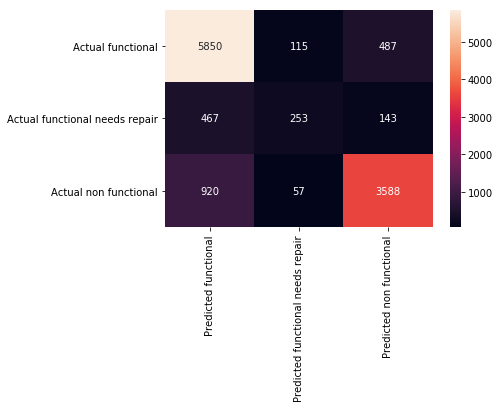

In [0]:
# precision = correct value predictions of a class / total predictions for class.
# recall = correct for the class / actual for the class.
plot_confusion_matrix(y_val, y_pred);

In [0]:
# how many correct predictions for non functional.
correct_predictions_nonfunctional = 3588
correct_predictions_nonfunctional

3588

In [0]:
# how many total predictions for non functional.
total_predictions_nonfunctional = 3588 + 143 + 487
total_predictions_nonfunctional

4218

In [0]:
# precision = correct value predictions of a class / total predictions for class.
precision = correct_predictions_nonfunctional / total_predictions_nonfunctional
precision

0.8506401137980085

In [0]:
# how many actual non functional waterpumps.
actual_nonfunctional = 920 + 57 + 3588
actual_nonfunctional

4565

In [0]:
# recall = correct for the class / actual for the class
recall = correct_predictions_nonfunctional / actual_nonfunctional
recall

0.7859802847754654

## Create the data frame file for download.

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
!head submission-01.csv

In [0]:
from google.colab import files 
files.download('submission-01.csv')